In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2006,1,1)
end = dt.datetime(2025,3,1)

df = yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545425,35.424693,26.900120,29.051483,855215656
2007-10-08,30.879339,33.645377,30.685230,33.645377,126671715
2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
2007-10-10,33.289505,33.968883,32.998344,33.839477,67931378
2007-10-11,37.009895,38.821569,32.998335,38.821569,106320954


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-02-21,261.899994,265.750000,259.399994,265.299988,10757038
2025-02-24,259.149994,261.799988,257.250000,258.000000,14599185
2025-02-25,255.750000,259.950012,254.899994,258.799988,21287363
2025-02-27,256.250000,257.450012,253.449997,254.000000,13614799
2025-02-28,250.850006,257.000000,247.300003,255.899994,38512868


In [6]:
df.shape

(4291, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4291 entries, 2007-10-05 to 2025-02-28
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4291 non-null   float64
 1   (High, POWERGRID.NS)    4291 non-null   float64
 2   (Low, POWERGRID.NS)     4291 non-null   float64
 3   (Open, POWERGRID.NS)    4291 non-null   float64
 4   (Volume, POWERGRID.NS)  4291 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 201.1 KB


In [8]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4291.000000,4291.000000,4291.000000,4291.000000,4.291000e+03
mean,83.746262,84.838702,82.674267,83.792063,1.191530e+07
std,69.962348,70.804721,69.098650,69.971039,2.043883e+07
min,19.001734,20.312198,17.036038,20.213913,0.000000e+00
25%,36.651369,37.190429,36.137387,36.720852,4.855060e+06
50%,58.662342,58.980651,57.538901,58.344031,8.435793e+06
75%,84.692425,85.697444,83.742713,84.991587,1.372515e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [10]:
df = df.reset_index()

In [11]:
df.shape

(4291, 6)

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.545425,35.424693,26.900120,29.051483,855215656
1,2007-10-08,30.879339,33.645377,30.685230,33.645377,126671715
2,2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
3,2007-10-10,33.289505,33.968883,32.998344,33.839477,67931378
4,2007-10-11,37.009895,38.821569,32.998335,38.821569,106320954


In [13]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [14]:
data01 = df.to_csv("powergrid.csv")
data01 = pd.read_csv("powergrid.csv")

In [15]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.54542541503906,35.424693329871594,26.90012004829192,29.05148348598712,855215656
2,1,2007-10-08,30.87933921813965,33.64537715335155,30.685230446068495,33.64537715335155,126671715
3,2,2007-10-09,32.98217010498047,33.27333102819074,29.229417128249786,30.895508777439975,116725709
4,3,2007-10-10,33.28950500488281,33.968883374439955,32.99834410019465,33.83947682149577,67931378


In [16]:
#Candlesticks
fig = go.Figure(data = [go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                       high = data01['High'], low = data01['Low'], close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [17]:
df = df.drop(['Date'], axis = 1)

C:\Users\swaga\AppData\Local\Temp\ipykernel_21924\1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [18]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.545425,35.424693,26.900120,29.051483,855215656
1,30.879339,33.645377,30.685230,33.645377,126671715
2,32.982170,33.273331,29.229417,30.895509,116725709
3,33.289505,33.968883,32.998344,33.839477,67931378
4,37.009895,38.821569,32.998335,38.821569,106320954


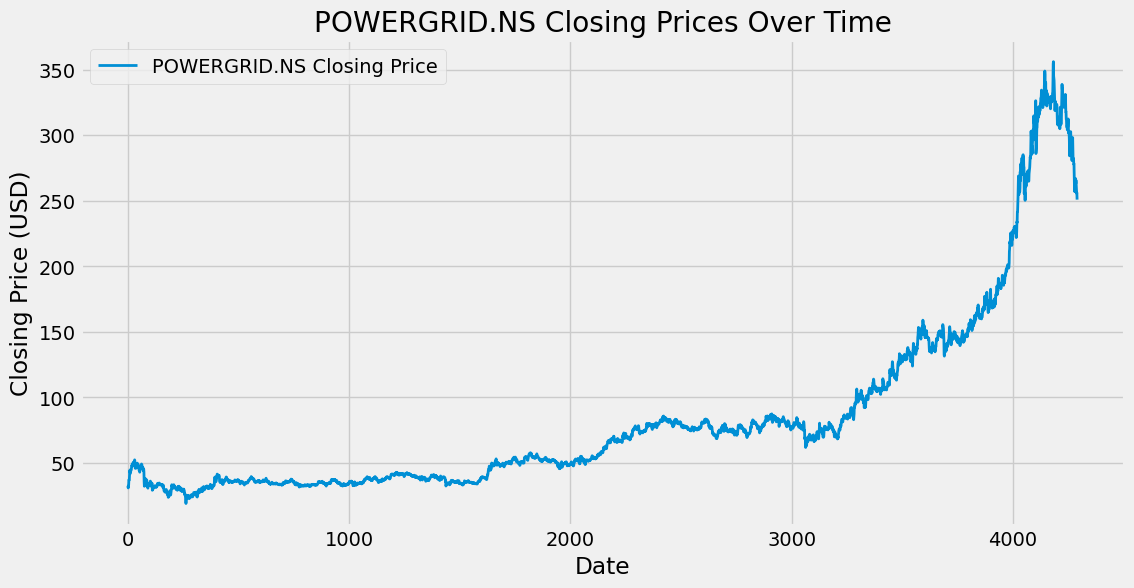

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 2)
plt.title(f'{stock} Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

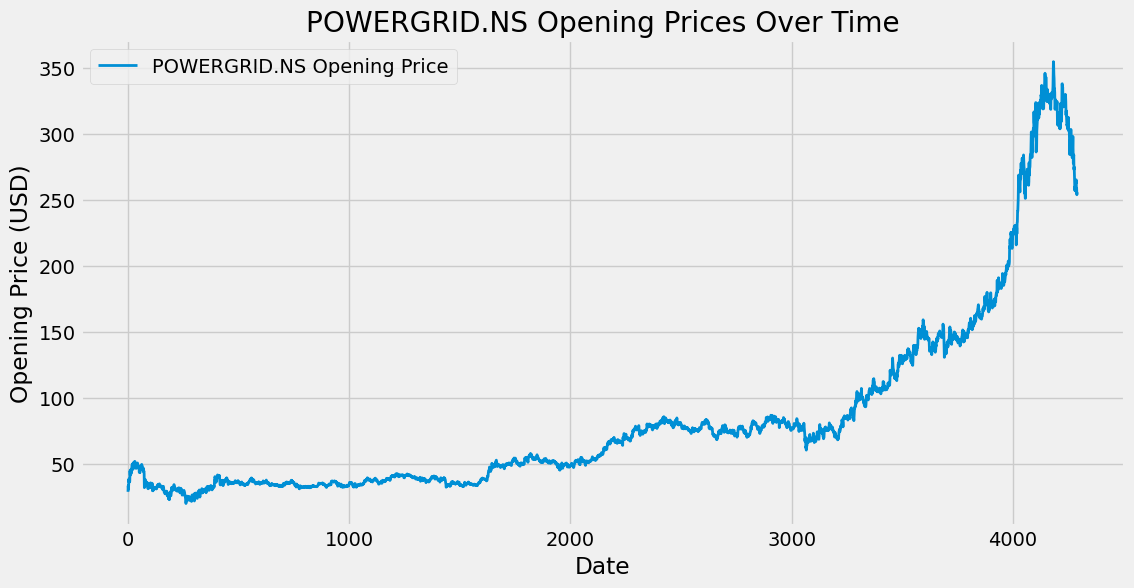

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 2)
plt.title(f'{stock} Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.show()

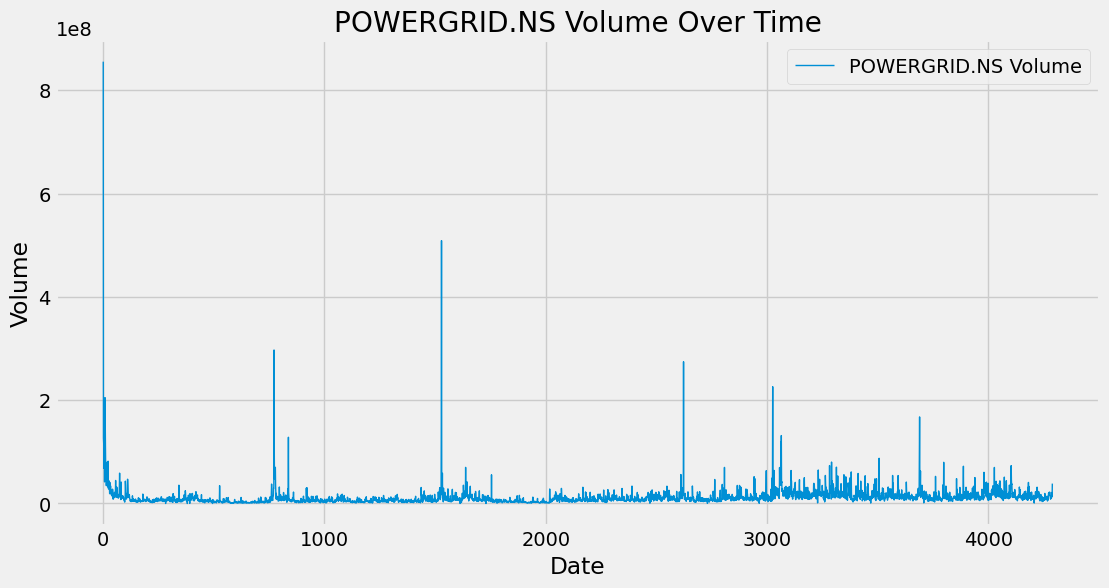

In [21]:
plt.figure(figsize = (12,6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 1)
plt.title(f'{stock} Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

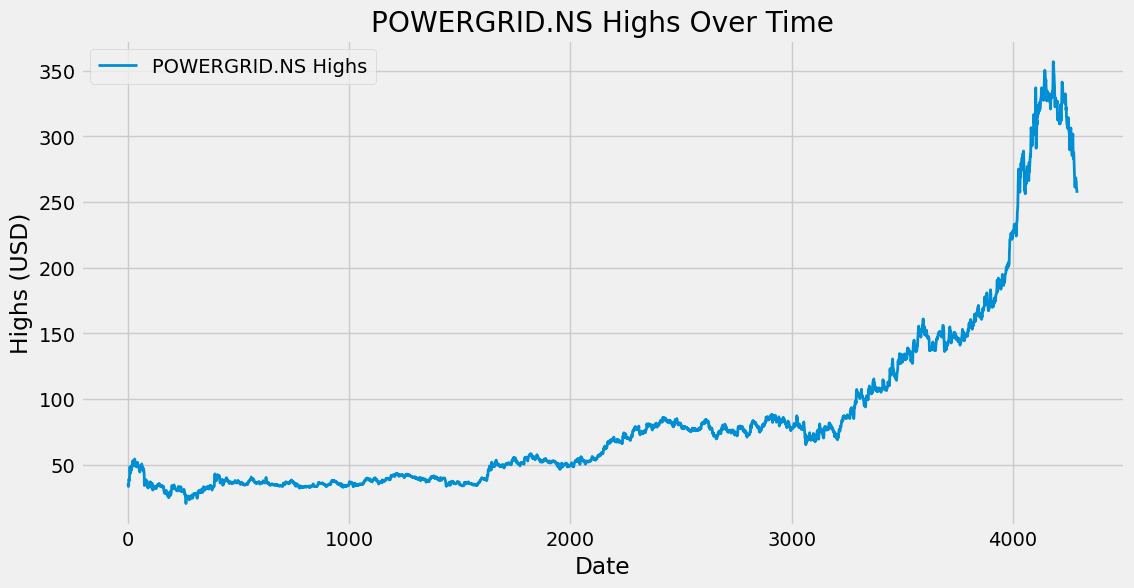

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df['High'], label = f'{stock} Highs', linewidth = 2)
plt.title(f'{stock} Highs Over Time')
plt.xlabel('Date')
plt.ylabel('Highs (USD)')
plt.legend()
plt.show()

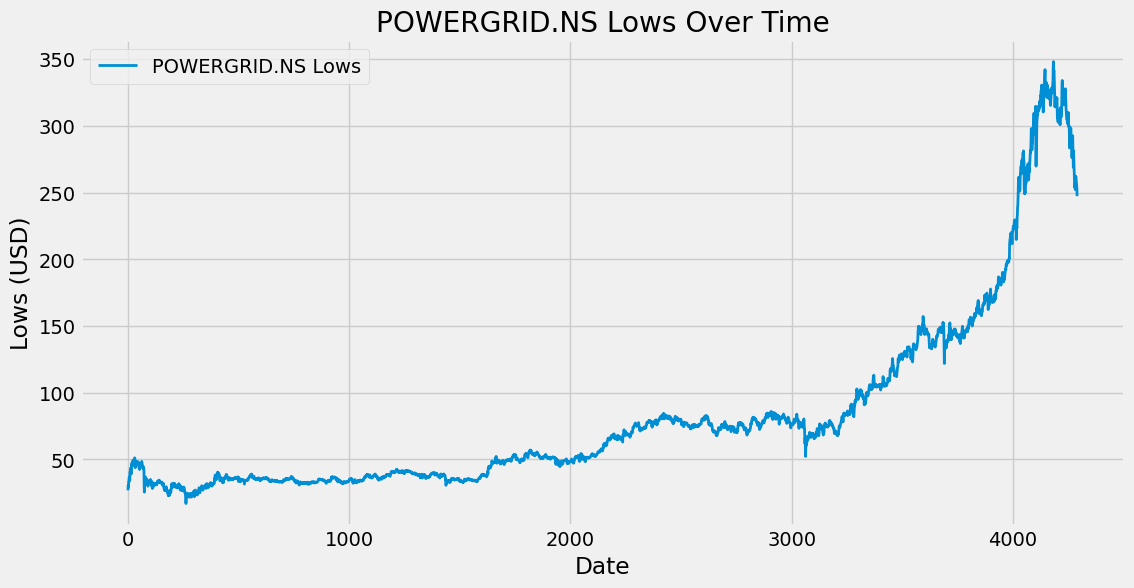

In [23]:
plt.figure(figsize = (12,6))
plt.plot(df['Low'], label = f'{stock} Lows', linewidth = 2)
plt.title(f'{stock} Lows Over Time')
plt.xlabel('Date')
plt.ylabel('Lows (USD)')
plt.legend()
plt.show()

In [24]:
#Moving Average 
MA_50 = df.Close.rolling(50).mean()
MA_100 = df.Close.rolling(100).mean()
MA_200 = df.Close.rolling(200).mean()

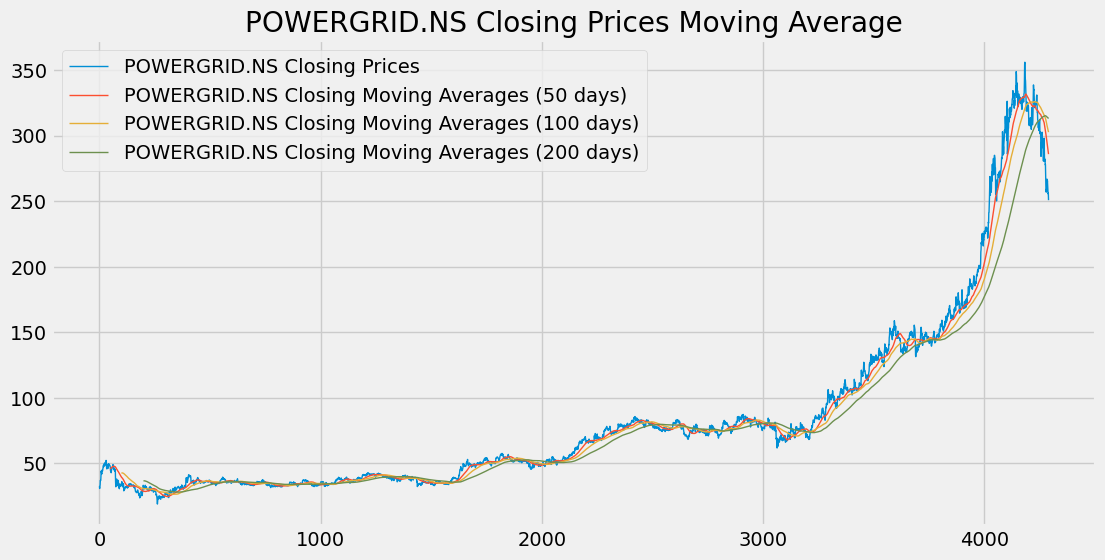

In [25]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, label = f'{stock} Closing Prices', linewidth = 1)
plt.plot(MA_50, label = f'{stock} Closing Moving Averages (50 days)', linewidth = 1)
plt.plot(MA_100, label = f'{stock} Closing Moving Averages (100 days)', linewidth = 1)
plt.plot(MA_200, label = f'{stock} Closing Moving Averages (200 days)', linewidth = 1)
plt.title(f'{stock} Closing Prices Moving Average')
plt.legend()
plt.show()

In [26]:
#Exponential Moving Average
EMA_50 = df['Close'].ewm(span = 50, adjust = False).mean()
EMA_100 = df.Close.ewm(span = 100, adjust = False).mean()
EMA_200 = df.Close.ewm(span = 200, adjust = False).mean()

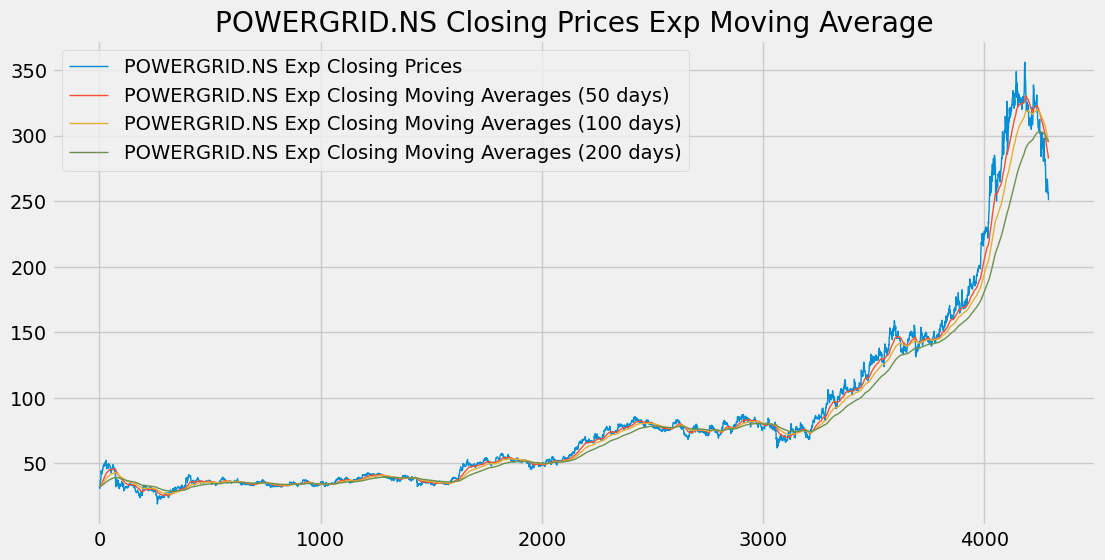

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, label = f'{stock} Exp Closing Prices', linewidth = 1)
plt.plot(EMA_50, label = f'{stock} Exp Closing Moving Averages (50 days)', linewidth = 1)
plt.plot(EMA_100, label = f'{stock} Exp Closing Moving Averages (100 days)', linewidth = 1)
plt.plot(EMA_200, label = f'{stock} Exp Closing Moving Averages (200 days)', linewidth = 1)
plt.title(f'{stock} Closing Prices Exp Moving Average')
plt.legend()
plt.show()

In [28]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [29]:
data_training.shape

(3003, 1)

In [30]:
data_testing.shape

(1288, 1)

In [31]:
scaler = MinMaxScaler(feature_range = (0,1))
data_tarining_array = scaler.fit_transform(data_training)

In [32]:
data_tarining_array

array([[0.19808604],
       [0.17371836],
       [0.20447374],
       ...,
       [0.85849291],
       [0.85335619],
       [0.84852198]])

In [33]:
data_tarining_array.shape

(3003, 1)

In [34]:
x_train = []
y_train = []
#Removing the first 100 values
for i in range(100, data_tarining_array.shape[0]):
    x_train.append(data_tarining_array[i-100:i])
    y_train.append(data_tarining_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train.shape

(2903, 100, 1)

In [36]:
#Model Building
model = Sequential()

model.add(Input(shape = (x_train.shape[1],1)))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - loss: 0.0713
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - loss: 0.0092
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - loss: 0.0062
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - loss: 0.0061
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - loss: 0.0058
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step - loss: 0.0061
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - loss: 0.0057
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - loss: 0.0056
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 28s 257ms/step - loss: 0.0056
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 32s 352ms/step - loss: 0.0044
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 32s 352ms/step - loss: 0.0040
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 31s 340ms/step - loss: 0.0041
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 291ms/step - loss: 0.0043
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 28s 148ms/step - loss: 0.0039
Epoch 15/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 

In [39]:
past_100_days = data_training.tail(100)

In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
input_data = scaler.fit_transform(final_df)

In [42]:
x_test = []
y_test = []
#Removing the first 100 values
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [43]:
x_test.shape

(1288, 100, 1)

In [44]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step


In [45]:
y_predicted.shape

(1288, 1)

In [46]:
scaler.scale_

array([0.00339719])

In [47]:
scaler_factor = 1/0.00339719
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

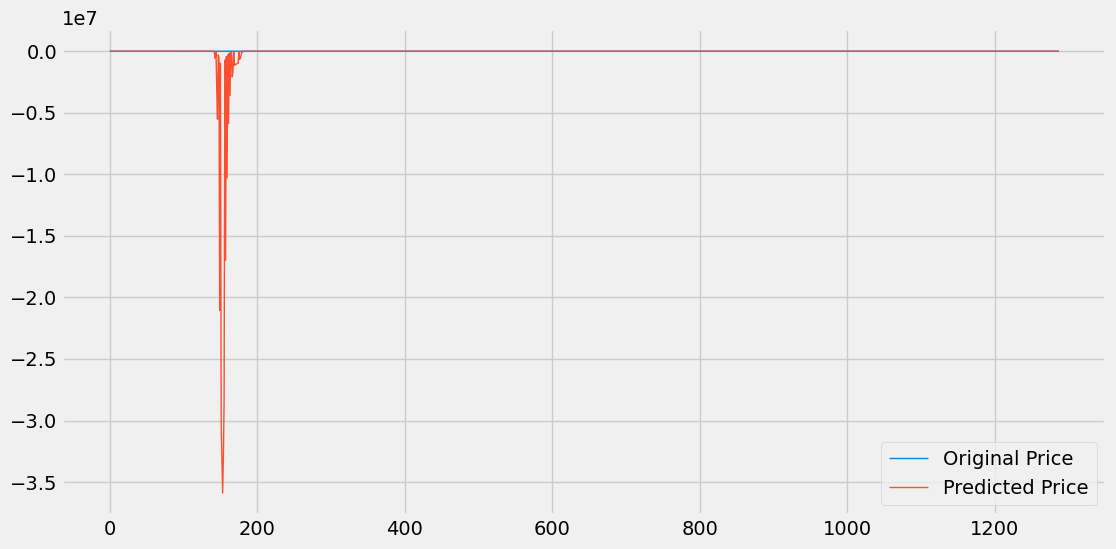

In [48]:
plt.figure(figsize = (12,6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [49]:
model.save('my_stock_model.keras')